<a href="https://colab.research.google.com/github/kshero18/THRIVE-Project/blob/main/THRIVE_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Required dependencies**

In [1]:
!pip -q install bar_chart_race

**Required Imports**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import bar_chart_race as bcr
import os
OUT_DIR = "outputs"
os.makedirs(OUT_DIR, exist_ok=True)

**Imports Datasets**

In [3]:
# Paths
GHI_PATH = "/content/global-hunger-index.csv"
GDP_PATH = "/content/global-hunger-index-vs-gdp-per-capita.csv"


**Loading Data**

In [4]:
ghi = pd.read_csv(GHI_PATH)
gdp = pd.read_csv(GDP_PATH)

**Changing columns**

In [5]:
GHI_COL = "Global Hunger Index (2021)"
GDPPC_COL = "GDP per capita, PPP (constant 2017 international $)"

# Cleaning Data

In [6]:
ghi["Year"] = pd.to_numeric(ghi["Year"], errors="coerce")
gdp["Year"] = pd.to_numeric(gdp["Year"], errors="coerce")

ghi[GHI_COL] = pd.to_numeric(ghi[GHI_COL], errors="coerce")
gdp[GHI_COL] = pd.to_numeric(gdp[GHI_COL], errors="coerce")
gdp[GDPPC_COL] = pd.to_numeric(gdp[GDPPC_COL], errors="coerce")

**Using countries with ISO-3 codes**

In [7]:
def keep_countries(df: pd.DataFrame) -> pd.DataFrame:
    df = df[df["Code"].notna()].copy()
    df = df[df["Code"].astype(str).str.len() == 3]
    return df

ghi = keep_countries(ghi)
gdp = keep_countries(gdp)

# VISUAL 1: Top 10 GHI in 2021 (Bar chart)  -> PNG

In [8]:
ghi_2021 = ghi[(ghi["Year"] == 2021) & ghi[GHI_COL].notna()].copy() #Only taking out the data from 2021 and not NA
top10 = ghi_2021.sort_values(GHI_COL, ascending=False).head(10) #Visualising top 10

*Plot 1*

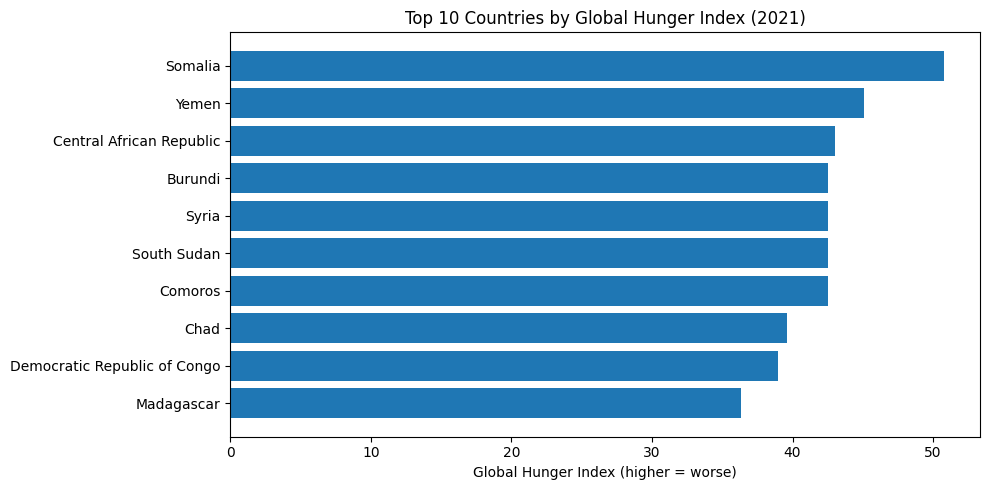

In [9]:
plt.figure(figsize=(10, 5))
plt.barh(top10["Entity"], top10[GHI_COL])
plt.gca().invert_yaxis()
plt.xlabel("Global Hunger Index (higher = worse)")
plt.title("Top 10 Countries by Global Hunger Index (2021)")
plt.tight_layout()
plt.savefig("/content/visual_1_top10_ghi_2021.png", dpi=200)
plt.show()

# VISUAL 2: GHI vs GDP per capita (Scatter) -> PNG

Note: This **OWID** extract does not provide GDPpc for all entities in 2021. In this OWID extract, GDP per capita is not available for 2021. We therefore use GDPpc from 2020 (latest available) and GHI from 2021.

*Our World in Data (OWID) is an open-access research platform that aggregates and standardises global data from trusted international sources to enable evidence-based analysis of major social, economic, and environmental issues.*

In [10]:
ghi_2021 = ghi[ghi["Year"] == 2021][["Entity", "Code", GHI_COL]].copy()
gdp_2020 = gdp[gdp["Year"] == 2020][["Entity", "Code", GDPPC_COL]].copy()

scatter_df = (
    ghi_2021.merge(gdp_2020, on=["Entity", "Code"], how="inner")
            .dropna(subset=[GHI_COL, GDPPC_COL])
)

print("Scatter rows:", len(scatter_df))  # should be > 0

Scatter rows: 121


*Plot 2*

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(scatter_df[GDPPC_COL], scatter_df[GHI_COL], alpha=0.7)
plt.xlabel("GDP per capita, PPP (constant 2017 international $) — 2020 (latest available)")
plt.ylabel("Global Hunger Index (2021)")
plt.title("GHI (2021) vs GDP per Capita (2020)")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "viz2_scatter_ghi2021_vs_gdp2020.png"), dpi=200)
plt.close()


# VISUAL 3: Average GHI by Continent (2021) -> PNG

GHI is taken from the 2021 GHI dataset, then we attach Continent from the GDP file using Entity as a lookup.


In [12]:
continent_lookup = (
    gdp[["Entity", "Continent"]]
    .dropna(subset=["Entity", "Continent"])
    .drop_duplicates(subset=["Entity"])
)

ghi_2021_with_cont = ghi_2021.merge(continent_lookup, on="Entity", how="inner")
continent_mean = (
    ghi_2021_with_cont.groupby("Continent")[GHI_COL]
    .mean()
    .sort_values(ascending=False)
)

*Plot 3*

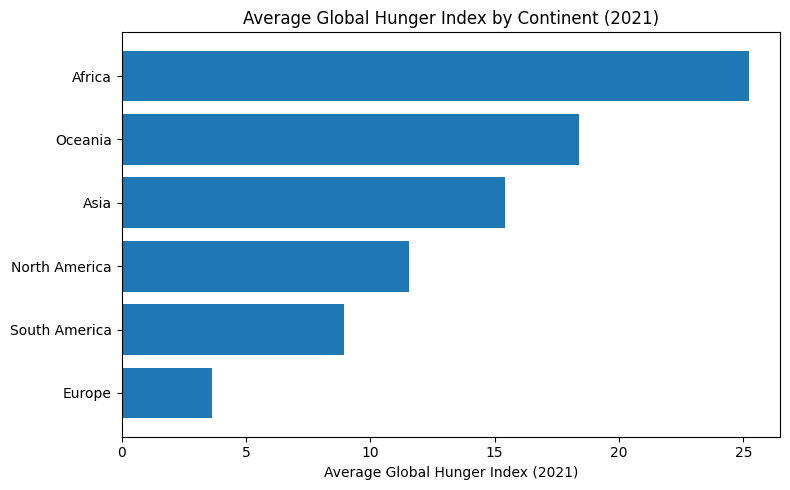

In [13]:
plt.figure(figsize=(8, 5))
plt.barh(continent_mean.index, continent_mean.values)
plt.gca().invert_yaxis()
plt.xlabel("Average Global Hunger Index (2021)")
plt.title("Average Global Hunger Index by Continent (2021)")
plt.tight_layout()
plt.savefig("/content/visual_3_ghi_by_continent_2021.png", dpi=200)
plt.show()

# RACING CHART: 8 nations over time -> MP4 (or GIF)

In [14]:
countries = ["India", "Nigeria", "Ethiopia", "Yemen",
             "Afghanistan", "Bangladesh", "Brazil", "China"]

race_df = ghi[ghi["Entity"].isin(countries)].dropna(subset=[GHI_COL]).copy()
pivot = race_df.pivot(index="Year", columns="Entity", values=GHI_COL).sort_index()

Plot 4: Racing Chart

In [15]:
bcr.bar_chart_race(
    df=pivot,
    filename="/content/ghi_race.mp4",   # change to .gif if you prefer
    title="Global Hunger Index Over Time (Selected Countries)",
    n_bars=len(countries),
    steps_per_period=20,
    period_length=700
)

/usr/local/lib/python3.12/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
/usr/local/lib/python3.12/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.12/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


Saving images as PNG files and Racing chart as MP4

In [16]:
print("Saved files:")
print(" - /content/visual_1_top10_ghi_2021.png")
print(" - /content/visual_2_ghi_vs_gdp.png")
print(" - /content/visual_3_ghi_by_continent_2021.png")
print(" - /content/ghi_race.mp4")


Saved files:
 - /content/visual_1_top10_ghi_2021.png
 - /content/visual_2_ghi_vs_gdp.png
 - /content/visual_3_ghi_by_continent_2021.png
 - /content/ghi_race.mp4
